In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load dataset 




In [3]:
X_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets/Training/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Training/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 2)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append(3)




# Prepare and load data Test

In [4]:
X_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets/Testing/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Testing/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 2)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 3)



In [5]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D


# Building the network

In [21]:
model = Sequential()
model.add(Conv2D(64, 3, input_shape=(130,130,3) , activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, 3,activation='relu'))
model.add(Conv2D(128, 3,activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


# compile Model

In [22]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 256)      

# Split data into Train and Validation

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# train the network

In [24]:
history = model.fit( X_train, y_train, epochs = 50 ,  verbose=1 , validation_data=(X_valid , y_valid) )

Epoch 1/50
56/56 [==============================] - 7s 111ms/step - loss: 1.2149 - accuracy: 0.4818 - val_loss: 1.0694 - val_accuracy: 0.5595
Epoch 2/50
56/56 [==============================] - 6s 98ms/step - loss: 0.8390 - accuracy: 0.6300 - val_loss: 1.0135 - val_accuracy: 0.6238
Epoch 3/50
56/56 [==============================] - 5s 98ms/step - loss: 0.7401 - accuracy: 0.6844 - val_loss: 0.7992 - val_accuracy: 0.6720
Epoch 4/50
56/56 [==============================] - 6s 99ms/step - loss: 0.5551 - accuracy: 0.7650 - val_loss: 0.5474 - val_accuracy: 0.7781
Epoch 5/50
56/56 [==============================] - 6s 100ms/step - loss: 0.4258 - accuracy: 0.8201 - val_loss: 0.5714 - val_accuracy: 0.7942
Epoch 6/50
56/56 [==============================] - 6s 99ms/step - loss: 0.3901 - accuracy: 0.8462 - val_loss: 0.6053 - val_accuracy: 0.7653
Epoch 7/50
56/56 [==============================] - 6s 99ms/step - loss: 0.2915 - accuracy: 0.8871 - val_loss: 0.5718 - val_accuracy: 0.8232
Epoch 8/50


# plot the loss and accuracy of the model over the training and validation data during training

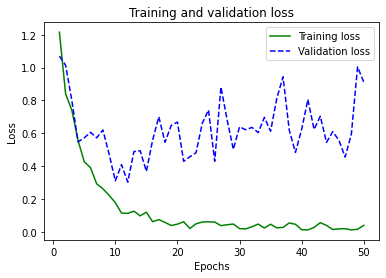

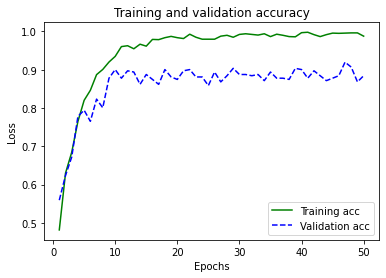

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', linestyle='dashed', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', linestyle='dashed', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()


# train & test loss and accuracy

In [26]:
score = model.evaluate(X_train , y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy: ', score[1]*100.0 ,'%')

Train loss: 0.00042365893023088574
Train accuracy:  100.0 %


In [27]:
score = model.evaluate(X_test , y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0 ,'%')

Test loss: 2.8635361194610596
Test accuracy:  71.0659921169281 %
